# <a name="debut"></a> Importation des bibliothèques à utiliser

In [1]:
import numpy as numpy
import pandas as panda
import matplotlib.pyplot as plot
import plotly.express as plotyexpress

# Partie 1 - Importation et Nettoyage des Données
> ##  <a name="aide_alimentaire"></a> Le Fichier d'Aide Alimentaire. (aide_alimentaire.csv)

> - Le pays bénéficiaire
> - L'année
> - Le produit
> - La quantité qui a été comme aide alimentaire en tonnes

[Retour Table des matières](#Table_des_matières)


> #### Lecture Fichier et Affichage des 8 premières données

In [2]:
# Variable du répertoire d'installation
repertoireFichierImportation = "F:/34. Projet 04/01_Les_Données/" 
# variable pour le nom du fichier à impoter
nomFicherImportation = "aide_alimentaire.csv"
# Importer les données du fichiers dans le Dataframe aideAlimentaire
aideAlimentaire = panda.read_csv(filepath_or_buffer= repertoireFichierImportation + nomFicherImportation ,sep = ',' ,header = 0, engine='python',on_bad_lines='skip')
# Afficher les 8 premières données
aideAlimentaire.head(8) 

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013.0,Autres non-céréales,682.0
1,Afghanistan,2014.0,Autres non-céréales,335.0
2,Afghanistan,2013.0,Blé et Farin,39224.0
3,Afghanistan,2014.0,Blé et Farin,15160.0
4,Afghanistan,2013.0,Céréales,40504.0
5,Afghanistan,2014.0,Céréales,15989.0
6,"Afghanistan,2013,""Fruits secs, total"",85",NaN,None,NaN
7,Afghanistan,2013.0,Huiles végétales,11087.0


> #### Types de données et Nombre de Lignes et de Colonnes du fichier

In [3]:
# Afficher un résumé concis d'un DataFrame.
aideAlimentaire.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", aideAlimentaire.shape[0], "Lignes et",aideAlimentaire.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pays bénéficiaire  1472 non-null   object 
 1   Année              1025 non-null   float64
 2   Produit            1025 non-null   object 
 3   Valeur             1025 non-null   float64
dtypes: float64(2), object(2)
memory usage: 46.1+ KB

Le fichier contient 1472 Lignes et 4 Colonnes


> #### Noms des Colonnes et Modification du  noms

In [4]:
# Remettre les noms des colonnes en minuscules
aideAlimentaire.columns = aideAlimentaire.columns.str.lower()
# Remplacer le nom de la colonne Valeur par quantité aide alimentaire
aideAlimentaire = aideAlimentaire.rename(columns={'valeur':'quantité_aide_alimentaire(Millions de t)'})
# Remplacer le nom de colonne de 'pays bénéficiaire'
aideAlimentaire = aideAlimentaire.rename(columns={'pays bénéficiaire':'zone'})
# Changer l'unité pour passer de millers à millions
aideAlimentaire['quantité_aide_alimentaire(Millons de t)'] = aideAlimentaire['quantité_aide_alimentaire(Millions de t)'] /1000
# Remplacer Swaziland par Eswatini
aideAlimentaire['zone'] = aideAlimentaire['zone'].replace(['Swaziland'],['Eswatini'])
# Afficher les changement.
aideAlimentaire.head(8) 

,zone,année,produit,quantité_aide_alimentaire(Millions de t),quantité_aide_alimentaire(Millons de t)
0,Afghanistan,2013.0,Autres non-céréales,682.0,0.682
1,Afghanistan,2014.0,Autres non-céréales,335.0,0.335
2,Afghanistan,2013.0,Blé et Farin,39224.0,39.224
3,Afghanistan,2014.0,Blé et Farin,15160.0,15.160
4,Afghanistan,2013.0,Céréales,40504.0,40.504
5,Afghanistan,2014.0,Céréales,15989.0,15.989
6,"Afghanistan,2013,""Fruits secs, total"",85",NaN,None,NaN,NaN
7,Afghanistan,2013.0,Huiles végétales,11087.0,11.087


> #### Nb de Doublons et Nb de Valeurs Manquantes

In [5]:
# Trouver le nombre des doublons en filtrant sur les 3 premières colonnes
doublon = aideAlimentaire.duplicated(['zone','année','produit']).sum()
print("Le nombre de doublon dans cette table est de" , doublon)
print("")

# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
aideAlimentaire.isnull().sum()
#print("Le nombre de valeur manquante par colonne dans cette table est de" , valeurManquante)
#print("")

Le nombre de doublon dans cette table est de 0

Le nombre de valeur manquante par colonne dans cette table est de


zone                                          0
année                                       447
produit                                     447
quantité_aide_alimentaire(Millions de t)    447
quantité_aide_alimentaire(Millons de t)     447
dtype: int64

> ## <a name="population"></a> Le Fichier de Population. (population.csv)

>> - Le pays
>> - L'année
>> - La Population du pays, exprimée en milliers d'habitants

[Retour Table des matières](#Table_des_matières)


> #### Lecture Fichier et Affichage des 8 premières données

In [6]:
# variable pour le nom du fichier à impoter
nomFicherImportation = "population.csv"
# Importer les données du fichiers
population = panda.read_csv(filepath_or_buffer= repertoireFichierImportation + nomFicherImportation ,sep = ',' ,header = 0)
# Afficher le dataframe
population.head(8) 

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
5,Afghanistan,2018,37171.921
6,Afrique du Sud,2013,53687.121
7,Afrique du Sud,2014,54544.186


> #### Types de données et Nombre de Lignes et de Colonnes du fichier

In [7]:
# Afficher un résumé concis d'un DataFrame.
population.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", population.shape[0], "Lignes et",population.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB

Le fichier contient 1416 Lignes et 3 Colonnes


> #### Noms des Colonnes et Modification du  noms

In [8]:
# Remettre les noms des colonnes en minuscules
population.columns = population.columns.str.lower()
# Remplacer le nom de la colonne Valeur par Population
population = population.rename(columns={'valeur':'population_en_millions'})
# Changer l'unité pour passer de millers à millions
population['population_en_millions'] = population['population_en_millions'] /1000
# Afficher les changements.
population.head(8) 

,zone,année,population_en_millions
0,Afghanistan,2013,32.269589
1,Afghanistan,2014,33.370794
2,Afghanistan,2015,34.413603
3,Afghanistan,2016,35.383032
4,Afghanistan,2017,36.296113
5,Afghanistan,2018,37.171921
6,Afrique du Sud,2013,53.687121
7,Afrique du Sud,2014,54.544186


> #### Nb de Doublons et Nb de Valeurs Manquantes 

In [9]:
# Trouver le nombre des doublons en filtrant sur les 2 premières colonnes
doublon = population.duplicated(['zone','année']).sum()
print("Le nombre de doublon dans cette table est de" , doublon)
print("")
# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
population.isnull().sum()


Le nombre de doublon dans cette table est de 0

Le nombre de valeur manquante par colonne dans cette table est de


zone                      0
année                     0
population_en_millions    0
dtype: int64

> ## <a name="Sous_Nutrition"></a> Le Fichier d'insécurité Alimentaire. (sous_nutrition.csv)

>> - Le pays
>> - Intervalle d'années
>> - Le nombre de personne en sous-alimentation en millions d'habitants

[Retour Table des matières](#Table_des_matières)

> #### Lecture Fichier et Affichage des 8 premières données

In [10]:
#variable pour le nom du fichier à impoter
nomFicherImportation = "sous_nutrition.csv"
# Importer les données du fichiers ()
sousNutrition = panda.read_csv(filepath_or_buffer= repertoireFichierImportation + nomFicherImportation ,sep = ',' ,header = 0 )
# Afficher le dataframe
sousNutrition.head(60) 

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
5,Afghanistan,2017-2019,11.1
6,Afrique du Sud,2012-2014,2.2
7,Afrique du Sud,2013-2015,2.5
8,Afrique du Sud,2014-2016,2.8
9,Afrique du Sud,2015-2017,3


> #### Types de données et Nombre de Lignes et de Colonnes du fichier

In [11]:
# Afficher un résumé concis d'un DataFrame.
sousNutrition.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", sousNutrition.shape[0], "Lignes et",sousNutrition.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB

Le fichier contient 1218 Lignes et 3 Colonnes


> #### Noms des Colonnes et Modification du  noms

In [12]:
# Remettre les noms des colonnes en minuscules
sousNutrition.columns = sousNutrition.columns.str.lower()
# Remplacer le nom de la colonne Valeur par Population
sousNutrition = sousNutrition.rename(columns={'valeur':'nb_de_Personnes_en_sous_nutrition_(millions)'})
# Afficher les valeurs uniques de la colonne "Année" du Dataframe sousNutrition
print("La colonne Année contient les valeurs suivantes :", sousNutrition['année'].unique())


La colonne Année contient les valeurs suivantes : ['2012-2014' '2013-2015' '2014-2016' '2015-2017' '2016-2018' '2017-2019']


In [13]:
# Remplacer les valeurs de Année 
sousNutrition['année'] = sousNutrition['année'].replace(['2012-2014', '2013-2015','2014-2016','2015-2017','2016-2018',
    '2017-2019'],['2013', '2014','2015','2016','2017','2018'])
# Changer le type gt la colonne Année en int à la place d'object
sousNutrition['année']= sousNutrition['année'].astype(int)
# Afficher un résumé concis d'un DataFrame.
sousNutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   zone                                          1218 non-null   object
 1   année                                         1218 non-null   int64 
 2   nb_de_Personnes_en_sous_nutrition_(millions)  624 non-null    object
dtypes: int64(1), object(2)
memory usage: 28.7+ KB


In [14]:
# Remplacer les valeurs de nombre de personnes (millions)  "<0.1" par 0
sousNutrition['nb_de_Personnes_en_sous_nutrition_(millions)'] = sousNutrition['nb_de_Personnes_en_sous_nutrition_(millions)'].replace(['<0.1'],['0'])
# Changer le type de la colonne en float à la place d'object
sousNutrition['nb_de_Personnes_en_sous_nutrition_(millions)']= sousNutrition['nb_de_Personnes_en_sous_nutrition_(millions)'].astype(float)
# Afficher le DataFrame
sousNutrition.head(60) 

,zone,année,nb_de_Personnes_en_sous_nutrition_(millions)
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
5,Afghanistan,2018,11.1
6,Afrique du Sud,2013,2.2
7,Afrique du Sud,2014,2.5
8,Afrique du Sud,2015,2.8
9,Afrique du Sud,2016,3.0


> #### Nb de Doublons et Nb de Valeurs Manquantes 

In [15]:
# Trouver le nombre des doublons en filtrant sur les 2 premières colonnes
doublon = sousNutrition.duplicated(['zone', 'année']).sum()
print("Le nombre de doublon dans cette table est de" , doublon)
print("")
# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
sousNutrition.isnull().sum()


Le nombre de doublon dans cette table est de 0

Le nombre de valeur manquante par colonne dans cette table est de


zone                                              0
année                                             0
nb_de_Personnes_en_sous_nutrition_(millions)    594
dtype: int64

> ## <a name="Dispo_Alimentaire"></a> Le Fichier de disponibilité alimentaire. (dispo_alimentaire.csv)

>> - Le pays
>> - Le produit
>> - 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
>> - 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
>> - Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

[Retour Table des matières](#Table_des_matières)

> #### Lecture Fichier et affichage des 8 premières données

In [16]:
# variable pour le nom du fichier à impoter
nomFicherImportation = "dispo_alimentaire.csv"
# Importer les données du fichiers ()
dispoAlimentaire = panda.read_csv(filepath_or_buffer= repertoireFichierImportation + nomFicherImportation ,sep = ',' ,header = 0 )
# Affichage du dataframe
dispoAlimentaire.head(8)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0


> #### Types de données et Nombre de Lignes et de Colonnes du fichier

In [17]:
# Afficher un résumé concis d'un DataFrame.
dispoAlimentaire.info()
# Afficher lr nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", dispoAlimentaire.shape[0], "Lignes et",dispoAlimentaire.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

> #### Noms des Colonnes et Modification du  noms

In [18]:
# Remettre les noms des colonnes en minuscules
dispoAlimentaire.columns = dispoAlimentaire.columns.str.lower()
# Remplacer les Nan par 0
dispoAlimentaire.fillna(0, inplace=True)
# Remplacer les noms de Pays suivant : Tchéquie (la) par Tchéquie, et Royaume-Uni par Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
dispoAlimentaire['zone'] = dispoAlimentaire['zone'].replace(["Tchéquie (la)","Royaume-Uni"],["Tchéquie", "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"])
# Afficher les changements.
dispoAlimentaire.head(8) 

,zone,produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),disponibilité de protéines en quantité (g/personne/jour),disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0


> #### Nb de Doublons et Nb de Valeurs Manquantes

In [19]:
# Trouver le nombre des doublons en filtrant sur les 2 premières colonnes
doublon = dispoAlimentaire.duplicated(['zone', 'produit', 'origine']).sum()
print("Le nombre de doublon dans cette table est de" , doublon)
print("")

# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
dispoAlimentaire.isnull().sum()

Le nombre de doublon dans cette table est de 0

Le nombre de valeur manquante par colonne dans cette table est de


zone                                                             0
produit                                                          0
origine                                                          0
aliments pour animaux                                            0
autres utilisations                                              0
disponibilité alimentaire (kcal/personne/jour)                   0
disponibilité alimentaire en quantité (kg/personne/an)           0
disponibilité de matière grasse en quantité (g/personne/jour)    0
disponibilité de protéines en quantité (g/personne/jour)         0
disponibilité intérieure                                         0
exportations - quantité                                          0
importations - quantité                                          0
nourriture                                                       0
pertes                                                           0
production                                                    

# Partie 2 - Réponse à Marc

> ## <a name="Question01"></a> Question 01 : La proportion de personnes en état de sous-nutrition

[Retour Table des matières](#Table_des_matières)

>> ### Sur la population mondiale

In [20]:
# Lier les dataframe Population et sousNutrition entre eux avec un filtre sur l'année 2017
question01Ma = panda.merge(population.loc[population['année'] == 2017,["zone", "population_en_millions"]], 
    sousNutrition.loc[sousNutrition['année'] == 2017,["zone", "nb_de_Personnes_en_sous_nutrition_(millions)"]], 
    on= "zone", how = 'outer')
# Calculer la Population mondiale
totalPopulation2017 = numpy.round(question01Ma['population_en_millions'].sum(),3)
totalMilliardPopulation2017 =numpy.round(totalPopulation2017/1000,3)
print("La Population Mondiale est de",totalPopulation2017, "Millions d'Habitants soit", totalMilliardPopulation2017,
      "milliards d'habitants")
print("")
# Calculer la population en sous nutrition
totalSousNutrition2017 = question01Ma['nb_de_Personnes_en_sous_nutrition_(millions)'].sum()
print("La Population en sous nutrition est de",totalSousNutrition2017, "Millions d'Habitants")
# Calculer la proportion d'habitants en Sous Nutrition
pourcentageSousNutrition =numpy.round((totalSousNutrition2017/totalPopulation2017),4)
print("")
#"{:.2%}".format(variable) permet d'afficher directement en % avec le nombre de chiffre derrière la virgule
print("{:.2%}".format(pourcentageSousNutrition), "des habitants de la planète sont en état de sous nutrition")

La Population Mondiale est de 7548.134 Millions d'Habitants soit 7.548 milliards d'habitants

La Population en sous nutrition est de 535.7 Millions d'Habitants

7.10% des habitants de la planète sont en état de sous nutrition


>> ### Sur la population avec des données de sous nutrition uniquement

In [21]:
# Filtrer les données, uniquement pour les pays ayant de la sous nutrition.
question01Ma = question01Ma.loc[(question01Ma['nb_de_Personnes_en_sous_nutrition_(millions)'] > 0 ),:]
# Calculer Calculer la Population mondiale
TotalPopulation2017 = numpy.round(question01Ma['population_en_millions'].sum(),3)
TotalMilliardPopulation2017 =numpy.round(TotalPopulation2017/1000,3)
print("La Population Mondiale est de",TotalPopulation2017, "Millions d'Habitants soit", TotalMilliardPopulation2017,
      "milliards d'habitants")
print("")
# Calculer la population en sous nutrition
TotalSousNutrition2017 = question01Ma['nb_de_Personnes_en_sous_nutrition_(millions)'].sum()
print("La Population en sous nutrition est de",TotalSousNutrition2017, "Millions d'Habitants")
# Calculer la proportion d'habitants en Sous Nutrition
PourcentageSousNutrition =numpy.round((TotalSousNutrition2017/TotalPopulation2017),4)
print("")
#"{:.2%}".format(variable) permet d'afficher directement en % avec le nombre de chiffre derrière la virgule
print("{:.2%}".format(PourcentageSousNutrition), "des habitants de la planète sont en état de sous nutrition")

La Population Mondiale est de 4167.954 Millions d'Habitants soit 4.168 milliards d'habitants

La Population en sous nutrition est de 535.6999999999999 Millions d'Habitants

12.85% des habitants de la planète sont en état de sous nutrition


> ## <a name="Question02"></a> Question 02 : Le nombre théorique de personnes qui pourraient être nourries avec la disponibilité totale


[Retour Table des matières](#Table_des_matières)

In [22]:
# Lier les dataframe Population et dispoAlimentaire entre eux avec un filtre sur l'année 2017
question02Ma = panda.merge(population.loc[population['année'] == 2017,["zone", "population_en_millions"]], 
    dispoAlimentaire, on= "zone", how = 'inner')
# Créer une colonne Disponibilité en million kcal/an 
question02Ma['disponibilité alimentaire en millions (kcal/jour)'] = (question02Ma
    ['disponibilité alimentaire (kcal/personne/jour)'] * question02Ma['population_en_millions'])
# Calculer le nombre de calories disponible par jour
totalCaloriesJour = numpy.round(question02Ma['disponibilité alimentaire en millions (kcal/jour)'].sum()/1000,3)
print("Un Total de", totalCaloriesJour, "milliards de Kcal est disponible pour nourrir les_humains par jour")
print("")
# Calculer le nombre théorque de personne à nourrir avec comme référence 2500 Kcal par humain
caloriesNecessaireHumain = 2500
nbHumainsTheorique = numpy.round(totalCaloriesJour / caloriesNecessaireHumain ,3)
PourcentageTheorique = nbHumainsTheorique /totalMilliardPopulation2017 
print("Avec" ,caloriesNecessaireHumain, "Kcal par jour, nous pouvons nourrir", nbHumainsTheorique ,
      "milliards d'habitants, soit", "{:.2%}".format(PourcentageTheorique), "de la population actuelle")
print("")

Un Total de 21182.163 milliards de Kcal est disponible pour nourrir les_humains par jour

Avec 2500 Kcal par jour, nous pouvons nourrir 8.473 milliards d'habitants, soit 112.25% de la population actuelle



> ## <a name="Question03"></a> Question 03 : Le nombre théorique de personnes qui pourraient être nourries avec la disponibilité alimentaire des produits végétaux


[Retour Table des matières](#Table_des_matières)

In [23]:
# Lier les dataframe population et dispoAlimentaire
question03Ma = panda.merge(population.loc[population['année'] == 2017,["zone", "population_en_millions"]], 
    dispoAlimentaire.loc[dispoAlimentaire['origine'] == 'vegetale'], on= "zone", how = 'inner')
# Créer une colonne Disponibilité en million kcal/an 
question03Ma['disponibilité alimentaire en millions (kcal/jour)'] = (question03Ma['disponibilité alimentaire (kcal/personne/jour)'] * question03Ma['population_en_millions'])
# Calculer le nombre de calories disponible par jour
totalCaloriesJour = numpy.round(question03Ma['disponibilité alimentaire en millions (kcal/jour)'].sum()/1000,3)
print("Un Total de", totalCaloriesJour, "milliards de Kcal est disponible pour nourrir les humains par jour")
print("")
# Calculer le nombre théorque de personne à nourrir avec comme référence 2500 Kcal par humain
caloriesNecessaireHumain = 2500
nbHumainsTheorique = numpy.round(totalCaloriesJour / caloriesNecessaireHumain ,3)
PourcentageTheorique = nbHumainsTheorique /totalMilliardPopulation2017 
print("Avec" ,caloriesNecessaireHumain, "Kcal par jour, nous pouvons nourrir" , nbHumainsTheorique , "milliards d'habitants, soit", "{:.2%}".format(PourcentageTheorique), "de la population actuelle des végétaux")
print("")

Un Total de 17449.509 milliards de Kcal est disponible pour nourrir les humains par jour

Avec 2500 Kcal par jour, nous pouvons nourrir 6.98 milliards d'habitants, soit 92.47% de la population actuelle des végétaux



> ## <a name="Question04"></a> Question 04 : la disponibilité intérieure

>> ### <a name="Question04a"></a> Question 04a : Les aliments pour Animaux

[Retour Table des matières](#Table_des_matières)



Disponibilité intérieure = Production + Importations - Exportations + Variation de Stock
Disponibilité intérieure = Nourriture + Aliments animaux + Semences + Pertes + Traitement + Autres utilisations


In [24]:
# On récupère le disponibilité intérieure
question04Ma = dispoAlimentaire
# calculer le total de la disponibilité Intérieur et du total des Aliments pour Animaux
totalDisponibiliteInterieure = numpy.round(question04Ma['disponibilité intérieure'].sum() / 1000,3)
totalAlimentsAnimaux = numpy.round(question04Ma['aliments pour animaux'].sum() / 1000, 3)
print("Les aliments pour Animaux représentent", totalAlimentsAnimaux, "Millions de tonnes sur une disponibilité totale de", totalDisponibiliteInterieure , "Millions de tonnes")
print("")
print("Soit " "{:.2%}".format(totalAlimentsAnimaux/totalDisponibiliteInterieure) , "de la demande totale" )

Les aliments pour Animaux représentent 1304.245 Millions de tonnes sur une disponibilité totale de 9848.994 Millions de tonnes

Soit 13.24% de la demande totale


>> ### <a name="Question04b"></a> Question 04b : Les pertes Alimentaires
[Retour Table des matières](#Table_des_matières)


In [25]:
# calculer le total des pertes alimentaires
totalPerteAlimentaire = numpy.round(question04Ma['pertes'].sum() / 1000,3)
print("Les pertes alimentaires représentent", totalPerteAlimentaire, "Millions de tonnes sur une disponibilité totale de", totalDisponibiliteInterieure , "Millions de tonnes")
print("")
print("Soit " "{:.2%}".format(totalPerteAlimentaire/totalDisponibiliteInterieure) , "de la demande totale" )

Les pertes alimentaires représentent 453.698 Millions de tonnes sur une disponibilité totale de 9848.994 Millions de tonnes

Soit 4.61% de la demande totale


>> ### <a name="Question04c"></a> Question 04c : Nourriture pour l'alimentation humaine
[Retour Table des matières](#Table_des_matières)


In [26]:
# calculer du total des pertes alimentaires
totalNourriture = numpy.round(question04Ma['nourriture'].sum() / 1000,3)
print("La nourriture alimentaire représentent", totalNourriture, "Millions de tonnes sur une disponibilité totale de", totalDisponibiliteInterieure , "Millions de tonnes")
print("")
print("Soit " "{:.2%}".format(totalNourriture/totalDisponibiliteInterieure) , "de la demande totale" )

La nourriture alimentaire représentent 4876.258 Millions de tonnes sur une disponibilité totale de 9848.994 Millions de tonnes

Soit 49.51% de la demande totale


>> #### Graphique

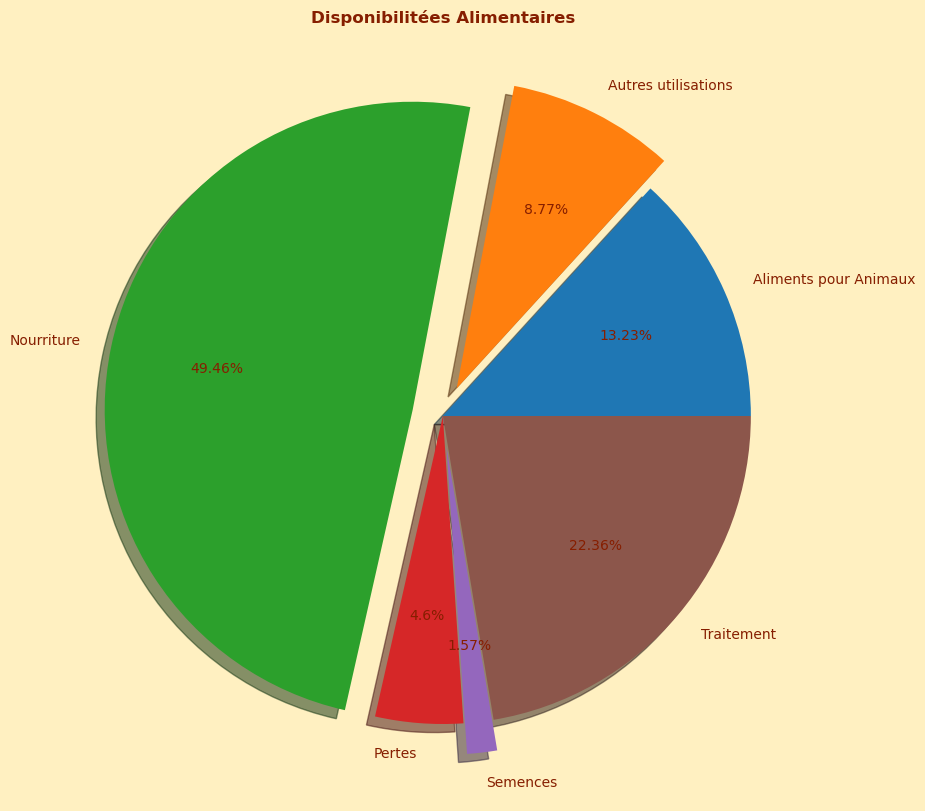

In [27]:
# Suppression des colonnes inutiles pour le graphique
question04Ma =question04Ma.drop(question04Ma.columns[[0,1,2,5,6,7,8,9,10,11,14,17]], axis=1).sum()
# On definit la taille du Pie plot ainsi que sa couleur
plot.figure(figsize = (10, 10)).patch.set_facecolor('#fff0c1')
# On regle et on affiche le Pie plot
plot.pie(x = question04Ma.head(6), 
            labels=['Aliments pour Animaux', 'Autres utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement'], #les noms affichés
            textprops = dict(color = '#861e00'), # Couleurs du texte
            explode = [0, 0.1, 0.1, 0, 0.1, 0], # Décallage des camemberts
            autopct = lambda x: str(round(x, 2)) + '%',
            pctdistance = 0.65, labeldistance = 1.1, #Distance texte dans Camembert et à l'extérieur
            shadow = True) #Ombre
plot.title('Disponibilitées Alimentaires', color = '#861e00', fontweight = 'bold'); #Titre en gras et Couleur
# Sauvegarde du graphique
plot.savefig("F:/34. Projet 04/04_Resultats/disponibilite_alimentaire.png", dpi=300, bbox_inches='tight', facecolor='#fff0c1')

# Partie 3 - Réponse à Mélanie

> ## <a name="Question21"></a> Question 01 : proportion de personnes sous-alimentées est la plus forte en 2017

[Retour Table des matières](#Table_des_matières)

In [28]:
# On récupère le Dataframe de la question de Marc : Question01
question01Mel = question01Ma
# Créer une colonne Ratio sous nutrition
question01Mel['ratio_sous_nutrition_%']= numpy.round((question01Mel['nb_de_Personnes_en_sous_nutrition_(millions)'] 
    / question01Mel['population_en_millions']) * 100, 2)
# Supprimer les colonnes inutiles
question01Mel = question01Mel.drop(columns=["population_en_millions","nb_de_Personnes_en_sous_nutrition_(millions)"])
# trier par ordre décroissant et afficher des 13 premiers résultats
question01Mel.sort_values(by=["ratio_sous_nutrition_%"], ascending=False).head(13)


,zone,ratio_sous_nutrition_%
81,Haïti,48.26
165,République populaire démocratique de Corée,47.19
109,Madagascar,41.06
104,Libéria,38.28
100,Lesotho,38.25
197,Tchad,37.96
157,Rwanda,35.06
126,Mozambique,32.81
200,Timor-Leste,32.17
0,Afghanistan,28.93


>> #### Graphique

In [29]:
# variable pour le nom du fichier à importer
nomFicherImportation = "Liste des codes ISO 3166-1.csv"
# Importer les données du fichiers dans le Dataframe aideAlimentaire
codeISO = panda.read_csv(filepath_or_buffer= repertoireFichierImportation + nomFicherImportation ,sep = ';' ,header = 0)
# Remplacer le nom de la colonne Valeur par quantité aide alimentaire
codeISO = codeISO.rename(columns={'Pays':'zone'})
codeISO = panda.merge(question01Mel, codeISO[['zone','ISO 3166-1 alpha-3']], on= "zone", how = 'outer')


In [30]:
#Paramètre du graphique
fig = plotyexpress.choropleth(codeISO, locations="ISO 3166-1 alpha-3", #DataFrame, Données Iso à croiser                    
                    color="ratio_sous_nutrition_%",   # la colonne qui doit être coloré                   
                    hover_name="zone",  # la colonne qui montre les pays
                    color_continuous_scale=plotyexpress.colors.sequential.Blugrn, #la couleur à afficher
                    projection = "natural earth") # la forme de la carte
# affichage du Graphe  
fig.show()

> ## <a name="Question22"></a> Question 02 : Liste des Pays qui ont le plus bénéficié d'aide


[Retour Table des matières](#Table_des_matières)


In [31]:
# On récupére le dataframe d'aide alimentaire
question02Mel = aideAlimentaire
# Supprimer les colonnes inutiles
question02Mel = question02Mel.drop(columns=["produit", "année"])
# Regrouper les données par pays
question02Mel = question02Mel.groupby(['zone']).agg({'quantité_aide_alimentaire(Millons de t)': numpy.sum})
# Afficher la liste des pays ayant reçu le plus d'aide par ordre décroissant
question02Mel.sort_values(by = 'quantité_aide_alimentaire(Millons de t)', ascending = False).head(13)


C:\Users\Nous\AppData\Local\Temp\ipykernel_15944\1463846857.py:6: FutureWarning:

The provided callable <function sum at 0x0000024C03F30180> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,quantité_aide_alimentaire(Millons de t)
zone,
République arabe syrienne,1376.466
Éthiopie,1311.820
Yémen,1130.305
Soudan du Sud,670.629
Soudan,637.657
Kenya,510.458
Bangladesh,340.691
Somalie,273.950
Tchad,253.048


> ## <a name="Question23"></a> Question 03 : Les pays ayant le plus de disponibilité par habitant


[Retour Table des matières](#Table_des_matières)


In [32]:
# récupére le dataframe de disponibilité alimentaire en sélectionnant les données 
question03Mel = dispoAlimentaire[['zone','disponibilité alimentaire (kcal/personne/jour)']]
# Grouper les données par zone
question03Mel = question03Mel.groupby(['zone']).sum()
# Afficher la liste des pays avec le plus de disponibilité par ordre décroissant
question03Mel.sort_values(by = 'disponibilité alimentaire (kcal/personne/jour)', ascending = False).head(13)

,disponibilité alimentaire (kcal/personne/jour)
zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


> ## <a name="Question24"></a> Question 04 : Les pays ayant le moins de disponibilité par habitant


[Retour Table des matières](#Table_des_matières)


In [33]:
#On récupère le dataframe précédent
question04Mel = question03Mel
# Afficher la liste des pays le moins de disponibilité par ordre décroissant
question04Mel.sort_values(by = 'disponibilité alimentaire (kcal/personne/jour)', ascending = True).head(13)

,disponibilité alimentaire (kcal/personne/jour)
zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


# Partie 4 - Analyse de Julien

> ## <a name="Question41"></a> Question 01 : Utilisation des céréales

[Retour Table des matières](#Table_des_matières)

In [34]:
# Récuperer la liste des céréales sur le site de la FAO (https://www.fao.org/faostat/fr/#data/FBS) dans groupe de produits
liste_cereale = ["Blé","Maïs","Millet","Orge","Riz (Eq Blanchi)","Avoine","Céréales, Autres","Seigle","Sorgho"]
# Récupérer le dataframe dispo alimentaire
question01Jul = dispoAlimentaire
# Supprimer les colonnes inutiles
question01Jul = question01Jul.drop(columns=["origine", "disponibilité alimentaire (kcal/personne/jour)", 
    "disponibilité alimentaire en quantité (kg/personne/an)","disponibilité de matière grasse en quantité (g/personne/jour)",
    "disponibilité de protéines en quantité (g/personne/jour)", "exportations - quantité","importations - quantité", 
    "production", "variation de stock", "autres utilisations", "pertes", "semences", "traitement" ])
# Garder les éléments de la liste Céréale, isin ne retourne que les valeurs vrais.
question01Jul= question01Jul[question01Jul['produit'].isin(liste_cereale)]
# grouper sur les produits
question01Jul= question01Jul.groupby("produit").sum()
question01Jul.reset_index(drop=False, inplace=True)
# Création des colonnes %Apa et %nourriture
question01Jul['%_aliments_animaux'] = numpy.round(question01Jul['aliments pour animaux'] / question01Jul['disponibilité intérieure'] * 100,2)
question01Jul['%_nourriture'] = numpy.round(question01Jul['nourriture'] / question01Jul['disponibilité intérieure'] * 100,2)
question01Jul.head(10)

,produit,zone,aliments pour animaux,disponibilité intérieure,nourriture,%_aliments_animaux,%_nourriture
0,Avoine,Afrique du SudAlbanieAlgérieAllemagneAngolaAnt...,16251.0,23407.0,3903.0,69.43,16.67
1,Blé,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,129668.0,679498.0,457824.0,19.08,67.38
2,"Céréales, Autres",AfghanistanAfrique du SudAlbanieAlgérieAllemag...,19035.0,27485.0,5324.0,69.26,19.37
3,Maïs,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,546116.0,955799.0,125184.0,57.14,13.10
4,Millet,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,3306.0,29911.0,23040.0,11.05,77.03
5,Orge,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,92658.0,140439.0,6794.0,65.98,4.84
6,Riz (Eq Blanchi),AfghanistanAfrique du SudAlbanieAlgérieAllemag...,33594.0,475656.0,377286.0,7.06,79.32
7,Seigle,Afrique du SudAlbanieAlgérieAllemagneAntigua-e...,8099.0,16567.0,5502.0,48.89,33.21
8,Sorgho,Afrique du SudAlbanieAlgérieAllemagneAngolaAnt...,24808.0,58237.0,24153.0,42.60,41.47


In [35]:
# Calculer et afficher les résultats
totalAnimaux = question01Jul["aliments pour animaux"].sum()
totalNourriture = question01Jul['nourriture'].sum()
totalDisponibilité = question01Jul['disponibilité intérieure'].sum()
pourcentageAnimaux = totalAnimaux  / totalDisponibilité
pourcentageNourriture = totalNourriture  / totalDisponibilité
print("{:.2%}".format(pourcentageAnimaux), "des céréales servent à nourrir des animaux")
print("")
print("{:.2%}".format(pourcentageNourriture), "des céréales servent à nourrir des humains")


36.29% des céréales servent à nourrir des animaux

42.75% des céréales servent à nourrir des humains


> ## <a name="Question42"></a> Question 02 : Utilisation du Manioc en Thailande
[Retour Table des matières](#Table_des_matières)

In [36]:
# Récuperer le Dataframe dispoAlimentaire
question02Jula = dispoAlimentaire
# Filtrer sur les données de la Thailande et du manioc
question02Jula = question02Jula.loc[(question02Jula['produit'] == "Manioc") & (question02Jula['zone'] == "Thaïlande"),:]
maniocExport = question02Jula['exportations - quantité'].sum() /1000
maniocProduction = question02Jula['production'].sum()/ 1000
maniocNourriture = question02Jula['nourriture'].sum()/ 1000
pourcentageManioc = maniocExport/maniocProduction
pourcentageNourriture = maniocNourriture/maniocProduction
# Affichee la proportion
print("La Thaïlande produit", maniocProduction, "milliers de tonnes de manioc, elle en exporte", maniocExport, "milliers de tonnes.")
print("")
print("La Thaïlande exporte donc", "{:.1%}".format(pourcentageManioc), " de sa production de Manioc.")
print("")
print("{:.1%}".format(pourcentageNourriture) , "du manioc est pour l'alimentation humaine en Thailande")


La Thaïlande produit 30.228 milliers de tonnes de manioc, elle en exporte 25.214 milliers de tonnes.

La Thaïlande exporte donc 83.4%  de sa production de Manioc.

2.9% du manioc est pour l'alimentation humaine en Thailande


In [37]:
# Récuperer le Dataframe de la 1ere question de Marc
question02Julb = question01Ma
# Filtrer sur les résultats de la Thailande uniquement
question02Julb  = question02Julb[question02Julb.zone=="Thaïlande"]
#question02Julb = question02Julb.loc[(question02Julb['zone'] == "Thaïlande"),:]
sousNutritionThailande = question02Julb['ratio_sous_nutrition_%'].values[0] / 100
print("la taux de sous nutrition en Thaïlande est de", "{:.2%}".format(sousNutritionThailande))

la taux de sous nutrition en Thaïlande est de 8.96%


# <a name="Table_des_matières"></a> Partie 5 - Table des matières



##  1. Importation et Nettoyage des Données

[Bibliothèque](#debut) : Importation des différentes bibliothèques

[Fichier Aide Alimentaire](#aide_alimentaire) : Exploration et mise en forme des données du fichier d'aide alimentaire 

[Fichier Population](#population) : Exploration et mise en forme des données du fichier Population

[Retour Sous_Nutrition](#Sous_Nutrition) : Exploration et mise en forme des données du fichier Sous Nutrition

[Retour Dispo Alimentaire](#Dispo_Alimentaire) : Exploration et mise en forme des données du fichier disponibilité alimentaire

## 2. Questions de Marc

>[Question n°01](#Question01) : Personnes en état de sous-nutrition

>[Question n°02](#Question02) : Personnes qui pourraient être nourries avec la disponibilité totale

>[Question n°03](#Question03) : Personnes qui pourraient être nourries avec la disponibilité des végétaux

>[Question n°04](#Question04) : Disponibilité Alimentaire

>> [Question n°04a](#Question04a) : Alimentation animales, 
> >[Question n°04b](#Question04b) : Pertes Alimentaires,
>> [Question n°04c](#Question04c) : Nourriture Humaines.


## 3. Questions de Mélanie

>[Question n°01](#Question21) : proportion de personnes sous-alimentées est la plus forte en 2017

>[Question n°02](#Question22) : Liste des Pays qui ont le plus bénéficié d'aide

>[Question n°03](#Question23) : Les pays ayant le plus de disponibilité par habitant

>[Question n°04](#Question24) : Les pays ayant le moins de disponibilité par habitant


## 4. Questions de Julien

>[Question n°01](#Question41) : Utilisation des Céréales

>[Question n°02](#Question42) : Utilisation du Manioc en Thaïlande

[Retour Table des matières](#Table_des_matières)
